# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Import Libraries</p>

In [11]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Load data</p>

In [2]:
df = pd.read_csv('/Users/pc/Downloads/Self Driving Car.v3-fixed-small.tensorflow/export/_annotations.csv')
df = shuffle(df)
df.head()

filename  width  height  \
99095   1478896994063749235_jpg.rf.ackrBjSkkWVo5Y82YgF...    512     512   
131714  1478899290649889717_jpg.rf.qqZyZqZFgsF9OeNBOJu...    512     512   
133753  1478896359361158339_jpg.rf.s9VAQLntg6DaBZ8BgQd...    512     512   
114756  1478897336266147869_jpg.rf.ce0934c7d5b162aaed4...    512     512   
13287   1478896767833862796_jpg.rf.83059c58c1ca167bfd9...    512     512   

       class  xmin  ymin  xmax  ymax  
99095    car   114   253   153   285  
131714   car   111   261   134   287  
133753   car    66   250    87   273  
114756   car   164   240   225   317  
13287    car    54   220   225   453

In [3]:
classes = df['class'].unique()
print(classes)

['car' 'truck' 'pedestrian' 'trafficLight-Green' 'trafficLight-Red'
 'trafficLight-GreenLeft' 'biker' 'trafficLight' 'trafficLight-RedLeft'
 'trafficLight-Yellow' 'trafficLight-YellowLeft']


In [4]:
labels = {
    'car': 1,
    'truck': 2,
    'biker': 3,
    'trafficLight-Green': 4,
    'pedestrian': 5,
    'trafficLight-RedLeft': 6,
    'trafficLight-Red': 7,
    'trafficLight': 8,
    'trafficLight-GreenLeft': 9,
    'trafficLight-Yellow': 10,
    'trafficLight-YellowLeft': 11,
}


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Show some labeled images</p>

In [5]:
# Get path images and boxes (x,y) for each class
boxes = {}
images = {}

base_path = '/Users/pc/Downloads/Self Driving Car.v3-fixed-small.tensorflow/export/'

for class_label in classes:
    # Find the first row corresponding to the class label
    first_row = df[df['class'] == class_label].iloc[0]

    # Read the image using OpenCV
    image_path = base_path + first_row['filename']
    images[class_label] = cv2.imread(image_path)

    # Extract bounding box coordinates (xmin, xmax, ymin, ymax)
    xmin = first_row['xmin']
    xmax = first_row['xmax']
    ymin = first_row['ymin']
    ymax = first_row['ymax']

    # Store the bounding box coordinates in the boxes dictionary
    boxes[class_label] = [xmin, xmax, ymin, ymax]


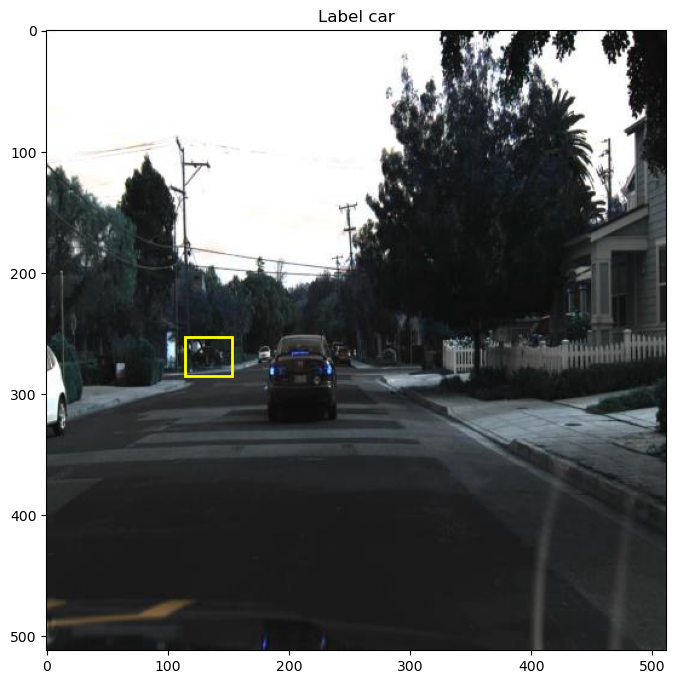

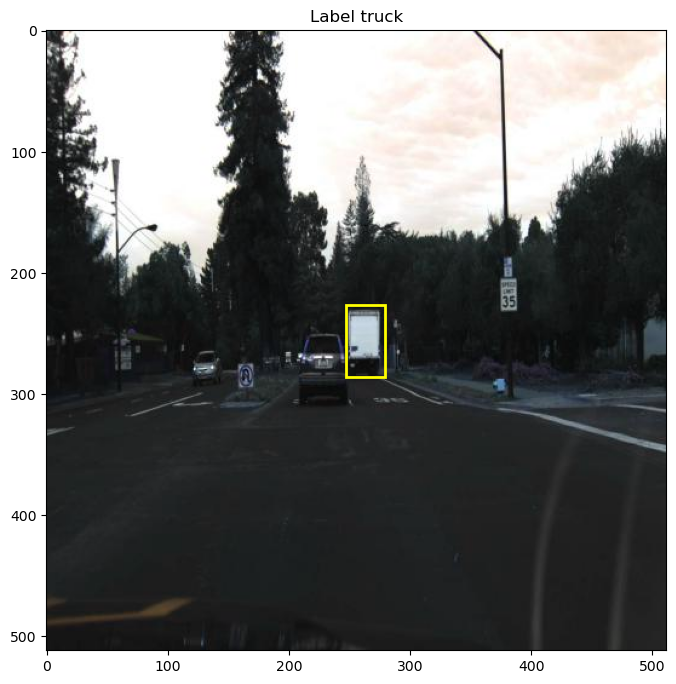

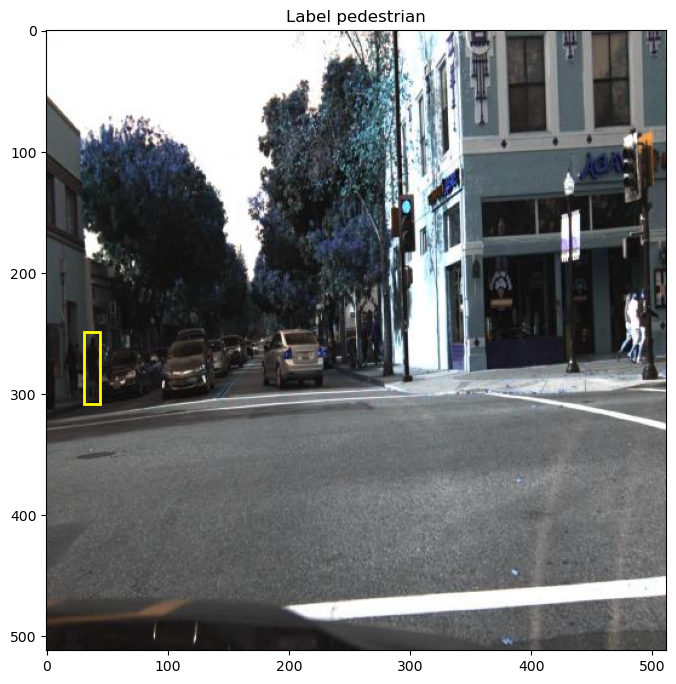

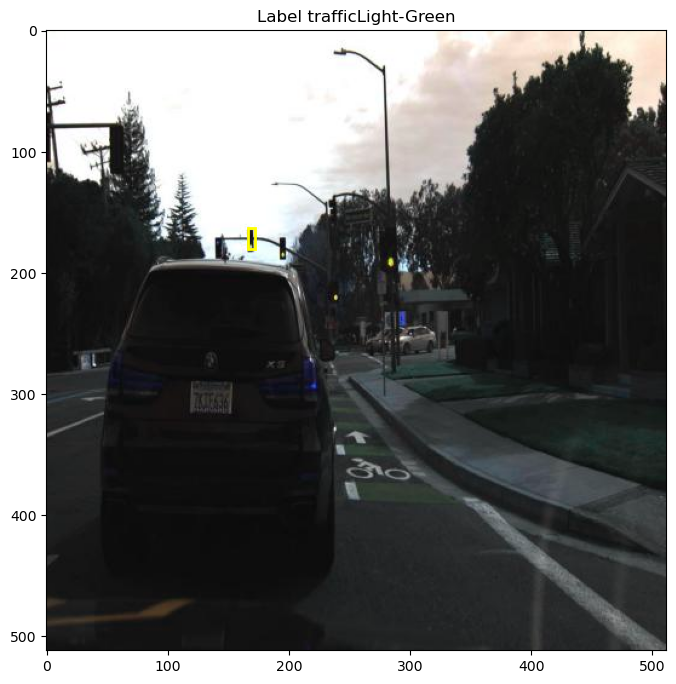

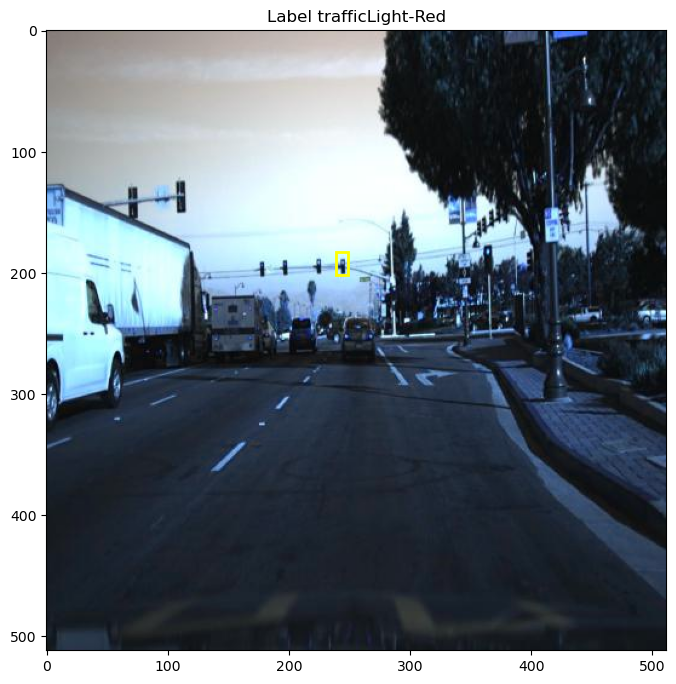

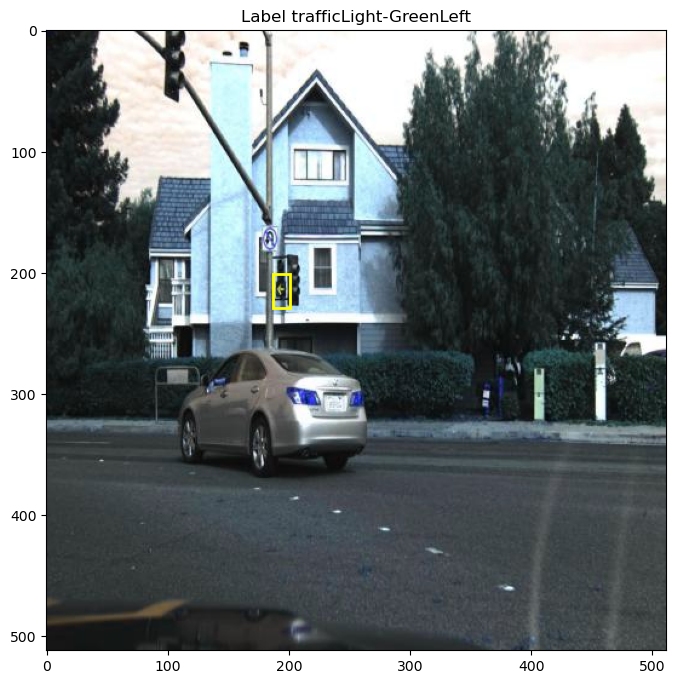

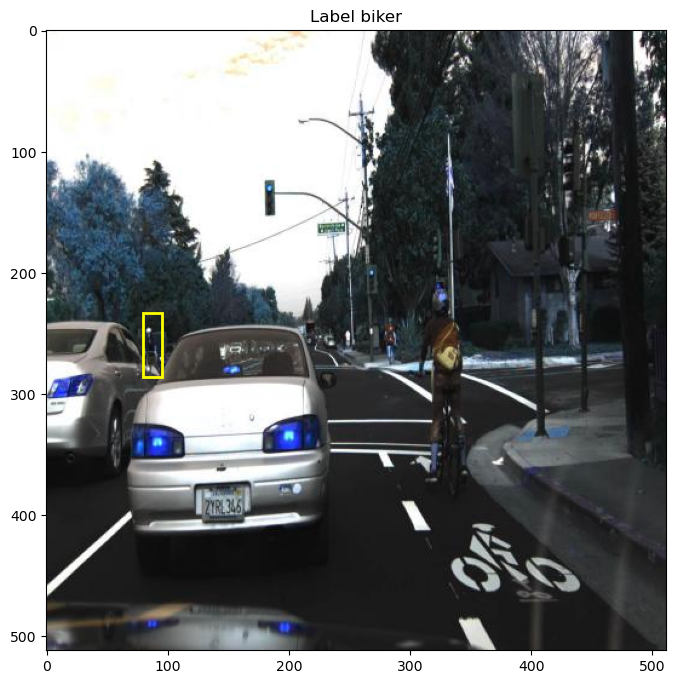

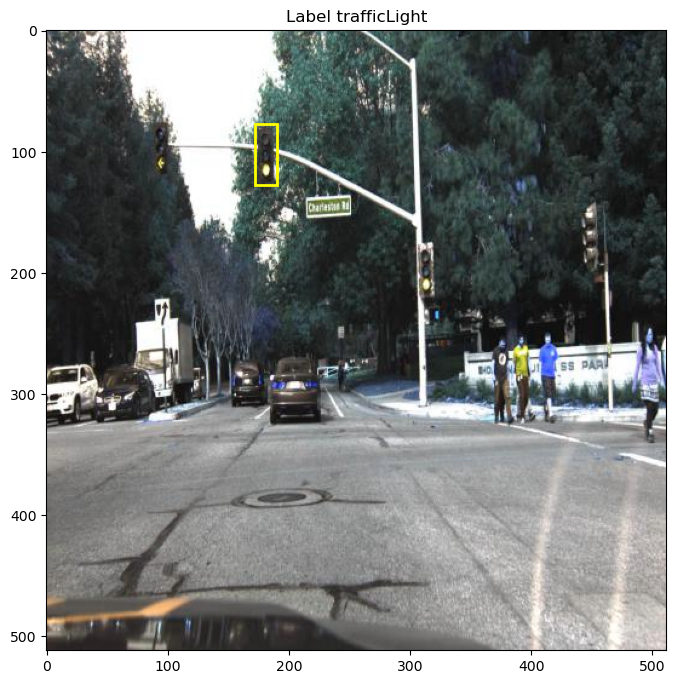

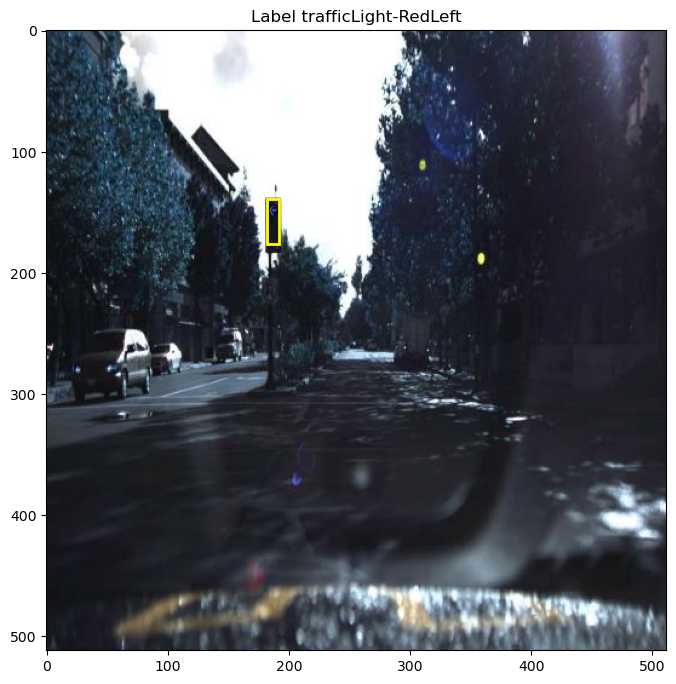

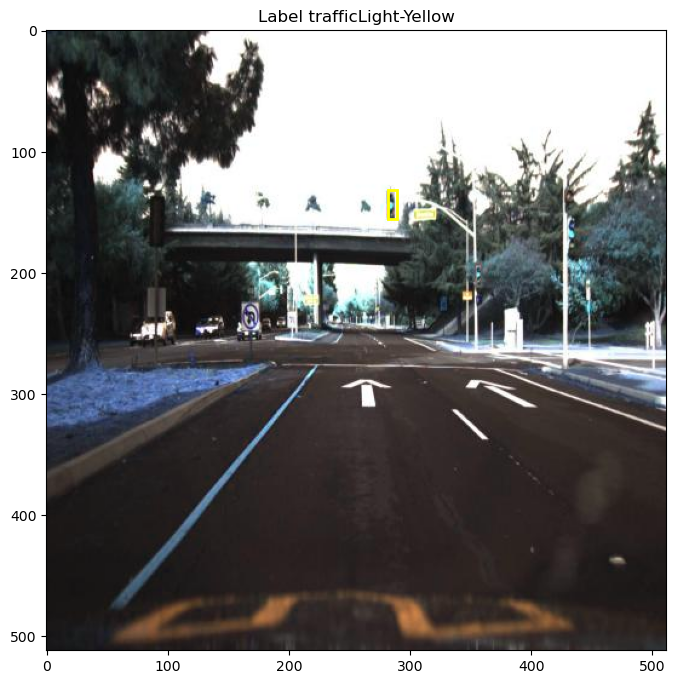

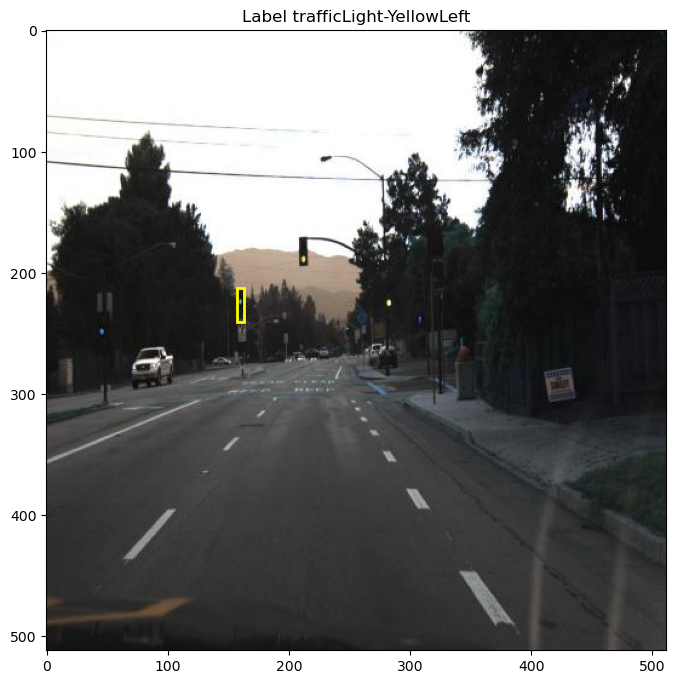

In [6]:
for class_label in classes:
    xmin, xmax, ymin, ymax = boxes[class_label][0], boxes[class_label][1], boxes[class_label][2], boxes[class_label][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + class_label)  # Use the class label directly
    plt.imshow(images[class_label])
    plt.gca().add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, color='yellow', fill=False, linewidth=2))

    plt.show()


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Model</p>

In [7]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [3]:
model = YOLO("yolov8m.pt")

In [4]:
# Assuming you have already loaded the YOLO model as 'model'

# Define the path to the image file in your dataset
image_path = "/Users/pc/Downloads/Self Driving Car.v3-fixed-small.tensorflow/export/1478020509699389290_jpg.rf.YZDgjQCsvZUCDItTkcSX.jpg"

# Make predictions on the image
results = model.predict(source=image_path, save=True, conf=0.2, iou=0.5)



image 1/1 /Users/pc/Downloads/Self Driving Car.v3-fixed-small.tensorflow/export/1478020509699389290_jpg.rf.YZDgjQCsvZUCDItTkcSX.jpg: 640x640 3 cars, 1 train, 1 truck, 5 traffic lights, 1534.5ms
Speed: 22.2ms preprocess, 1534.5ms inference, 666.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [5]:
result = results[0]
box = result.boxes[0]

In [6]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [7]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 9.0
Coordinates: [452.92498779296875, 60.0412712097168, 469.0438537597656, 112.06111907958984]
Probability: 0.7485532164573669


In [8]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: traffic light
Coordinates: [453, 60, 469, 112]
Probability: 0.75
---
Object type: truck
Coordinates: [310, 257, 348, 299]
Probability: 0.64
---
Object type: traffic light
Coordinates: [41, 0, 57, 32]
Probability: 0.43
---
Object type: car
Coordinates: [384, 260, 399, 272]
Probability: 0.39
---
Object type: car
Coordinates: [53, 459, 439, 512]
Probability: 0.36
---
Object type: traffic light
Coordinates: [107, 153, 137, 203]
Probability: 0.35
---
Object type: train
Coordinates: [51, 459, 436, 512]
Probability: 0.33
---
Object type: traffic light
Coordinates: [156, 160, 167, 199]
Probability: 0.33
---
Object type: traffic light
Coordinates: [143, 156, 167, 200]
Probability: 0.24
---
Object type: car
Coordinates: [399, 259, 420, 274]
Probability: 0.21
---


In [24]:
# Assuming you have already loaded the YOLO model as 'model'

# Define the path to the image file in your dataset
image_path = "/Users/pc/Downloads/Self Driving Car.v3-fixed-small.tensorflow/export/1478900907398225217_jpg.rf.Go0SnsfckoU713V9D74p.jpg"

# Make predictions on the image
results1 = model.predict(source=image_path, save=True, conf=0.2, iou=0.5)



image 1/1 /Users/pc/Downloads/Self Driving Car.v3-fixed-small.tensorflow/export/1478900907398225217_jpg.rf.Go0SnsfckoU713V9D74p.jpg: 640x640 6 cars, 2 trucks, 1305.3ms
Speed: 21.6ms preprocess, 1305.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


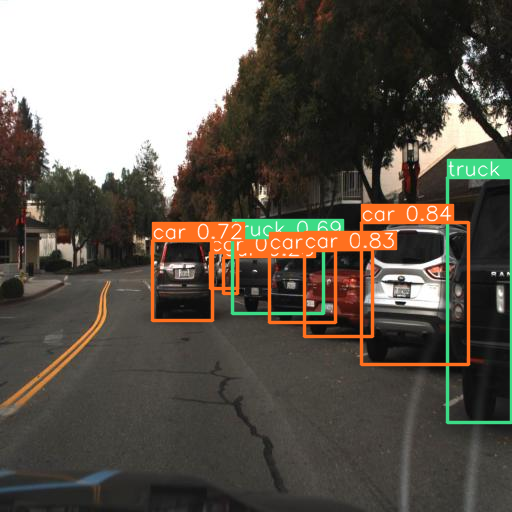

In [25]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Exporting Results</p>

In [21]:
import time

# Save results to a CSV file
results_df = pd.DataFrame(columns=['Image', 'Class', 'X_min', 'Y_min', 'X_max', 'Y_max', 'Confidence'])

for result in results:
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        results_df = results_df.append({'Image': image_path, 'Class': class_id, 'X_min': cords[0], 'Y_min': cords[1], 'X_max': cords[2], 'Y_max': cords[3], 'Confidence': conf}, ignore_index=True)

for result in results1:
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        cords = box.xyxy[0].tolist()
        cords = [round(x) for x in cords]
        conf = round(box.conf[0].item(), 2)
        results_df = results_df.append({'Image': image_path, 'Class': class_id, 'X_min': cords[0], 'Y_min': cords[1], 'X_max': cords[2], 'Y_max': cords[3], 'Confidence': conf}, ignore_index=True)

# Save results to a CSV file with a timestamp
timestamp = int(time.time())  # Get current timestamp

results_csv_filename = f'object_detection_results_{timestamp}.csv'
results_df.to_csv(results_csv_filename, index=False)

# Save the images generated from your experiments
for i, result in enumerate(results + results1):
    image = result.orig_img
    image_path = f'result_image_{i}.png'
    cv2.imwrite(image_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

